<center><h1> Aplicación de los Métodos de Agrupamiento</h1></center>
<center><h1> Aprendizaje No Supervisado</h1></center>
<center><h1> Agrupamiento basado en densidad : DBSCAN</h1></center>
<br>

### - Alexandro López González
### - Leonardo Pacheco Garduño
### - Manuel Garcia Sanes
<br>
<br>

En este notebook, realizaremos los siguiente:

- Aplicación del algoritmo DBSCAN  a los dos datasets seleccionados. 

- Evaluación de los resultados utilizando métricas intrínsecas o extrínsecas según sea el caso

- Análisis del resultado
<br>
<br>


## 1. Cargamos las librerias necesarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools as it


## 2. Cargamos el dataset con agrupamiento conocido

**Nombre:<br>

SEEDS<br>

**Abstract: 

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.<br>

**Atributos (Reales): <br>

area A,<br>
perimeter P,<br>
compactness C = 4piA/P^2,<br>
length of kernel,<br>
width of kernel,<br>
asymmetry coefficient<br>
length of kernel groove. All of these parameters were real-valued continuous.<br>

**Instancias:**<br>

210<br>

URL:<br>
https://archive.ics.uci.edu/ml/datasets/seeds#


El dataset cargado tiene 210 instancias, 7 atributos y 3 clusters.


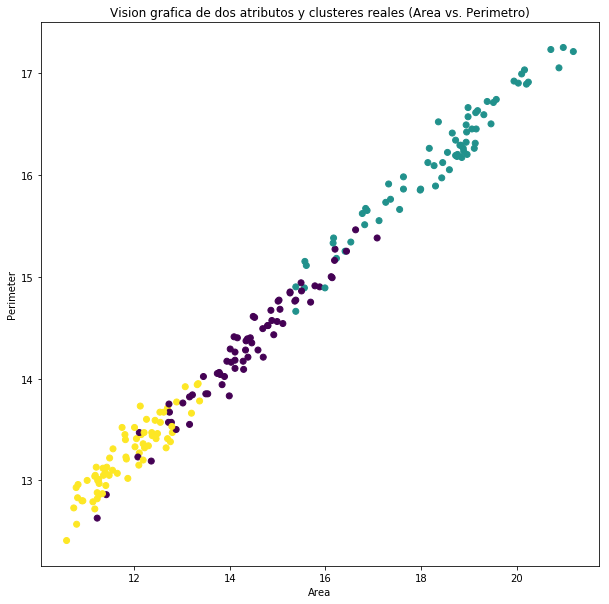

In [23]:
np.random.seed(31) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

#Cargamos los datos
data_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

#Mezclamos y separamos la columa clase  
D = np.array(pd.read_csv(data_file_url,delimiter='\s+', header=None))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:-1]
Dy = D[:,-1]

#Graficamos la parej de atributos seleccionada:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Dx[:, 0], Dx[:, 1], c=Dy)
ax.set_xlabel("Area")
ax.set_ylabel("Perimeter")
ax.set_title("Vision grafica de dos atributos y clusteres reales (Area vs. Perimetro)")

print()



print('El dataset cargado tiene',Dx.shape[0],'instancias,', Dx.shape[1], 'atributos y' ,len(np.unique(Dy)) , 'clusters.')




Uno de los pasos clave del algoritmo DBSCAN es el descubrimiento del vecindario (de un ejemplo $x_i$). Para ello sólo se precisa de la matriz de distancias y el parámetro $\epsilon$ que marca un umbral en la distancia máxima entre dos puntos que define el vecindario:


In [24]:
# Descubrimiento del vecinadario

def encuentra_vecindario(mDistancia, i, eps):
    vecinos = np.where(mDistancia[i,:] < eps)[0]
    
    vecinos = vecinos[vecinos != i]
            
    return vecinos


Aparte de ello, el algoritmo DBSCAN recorre el conjunto de datos y para cada ejemplo, si no ha sido asignado a otro clúster y tiene un número de vecinos mínimo necesario $M$, crea un nuevo clúster y asigna al mismo todos los ejemplos no asignados denso-alcanzables:


In [25]:
def agrupamiento_densidad_DBSCAN(mDistancia, eps, M):
 
    labels = np.zeros(mDistancia.shape[0])
    C = 0
    
    for i in np.arange(mDistancia.shape[0]):
    
        if labels[i] != 0:
            continue
        
        vecindario = encuentra_vecindario(mDistancia, i, eps)
        
        if len(vecindario)<M:
            # Si NO es un punto nuclear
            labels[i] = -1
        else:  
            # Si es un punto nuclear
            C += 1
            labels[i] = C
            expandir_cluster(mDistancia, labels, vecindario, C, eps, M)
    
    return labels


La función 'expandir_cluster' trata de asignar otros ejemplos más allá del vecindario de $x_i$ al nuevo clúster que se ha creado para él. Busca entre los ejemplos del vecindario actual y si alguno de ellos es un punto nuclear (mínimo número de vecinos, $M$), se incorpora su vecindario al vecindario del clúster que se está explorando. Todos los elementos del vecindario se asignan al clúster:


In [26]:
def expandir_cluster(mDistancia, labels, vecindario, C, eps, M):
    it = 0
    while it < vecindario.size:
        j = vecindario[it]
       
        if labels[j] == -1:
            labels[j] = C
        elif labels[j] == 0:
            labels[j] = C
            
            vecindario_j = encuentra_vecindario(mDistancia, j, eps)
            
            if vecindario_j.size >= M:
                vecindario = np.append(vecindario, vecindario_j)
        it += 1        


Con estas tres funciones ya podemos ejecutar el algoritmo DBSCAN. Sólo necesitamos la matriz de distancias y asignar valor al umbral que define el vecindario ($\epsilon$) y al umbral que define un punto nuclear ($M$):


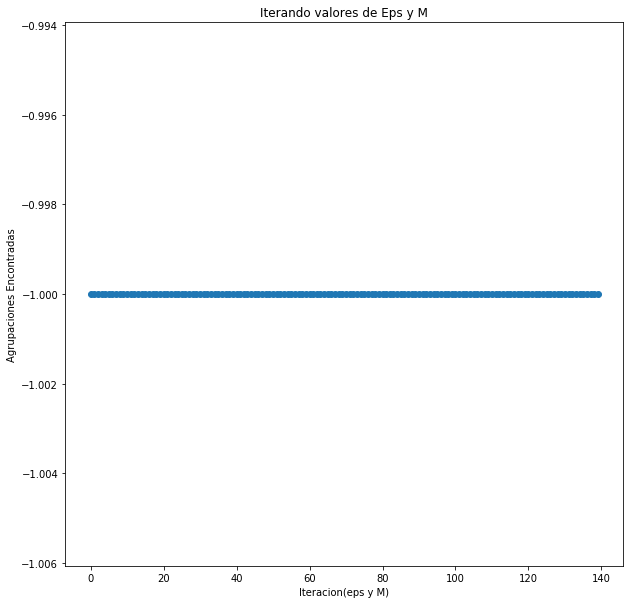

In [33]:
from sklearn.metrics.pairwise import euclidean_distances

clusters_found=[]
for e in [.03,.04,.05,.06,.07,.08,.09]:
    for m in range(20,40):
        mDistancia = euclidean_distances(Dx)
        Dyp = agrupamiento_densidad_DBSCAN(mDistancia,e,m)
        clusters_found.append(np.unique(Dyp))
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(range(len(clusters_found)), clusters_found)
ax.set_xlabel("Iteracion(eps y M)")
ax.set_ylabel("Agrupaciones Encontradas")
ax.set_title("Iterando valores de Eps y M")
print("")



Y las métricas de bondad del agrupamiento son:<br>

1. Matriz confusuón<br>
2. Medida error<br>
3. Medida pureza<br>
4. Medida precisión<br>
5. Medida recall<br>
6. Medida f1 especifica<br>
7. Medida f1





Nota: No encontramos valores de EPS y M que nos generen agrupaciones con el algoritmi DBSCAN.




## 3. Cargamos el dataset con agrupamiento desconocido

Nota: Por fines practicos, utlizaremos el mismo dataset, pero lo analizamos ignorando el conocimiento de su agrupamiento

Nota2: No encontramos valores de EPS y M que nos generen agrupaciones con el algoritmi DBSCAN.
